In [ ]:
EXP 1

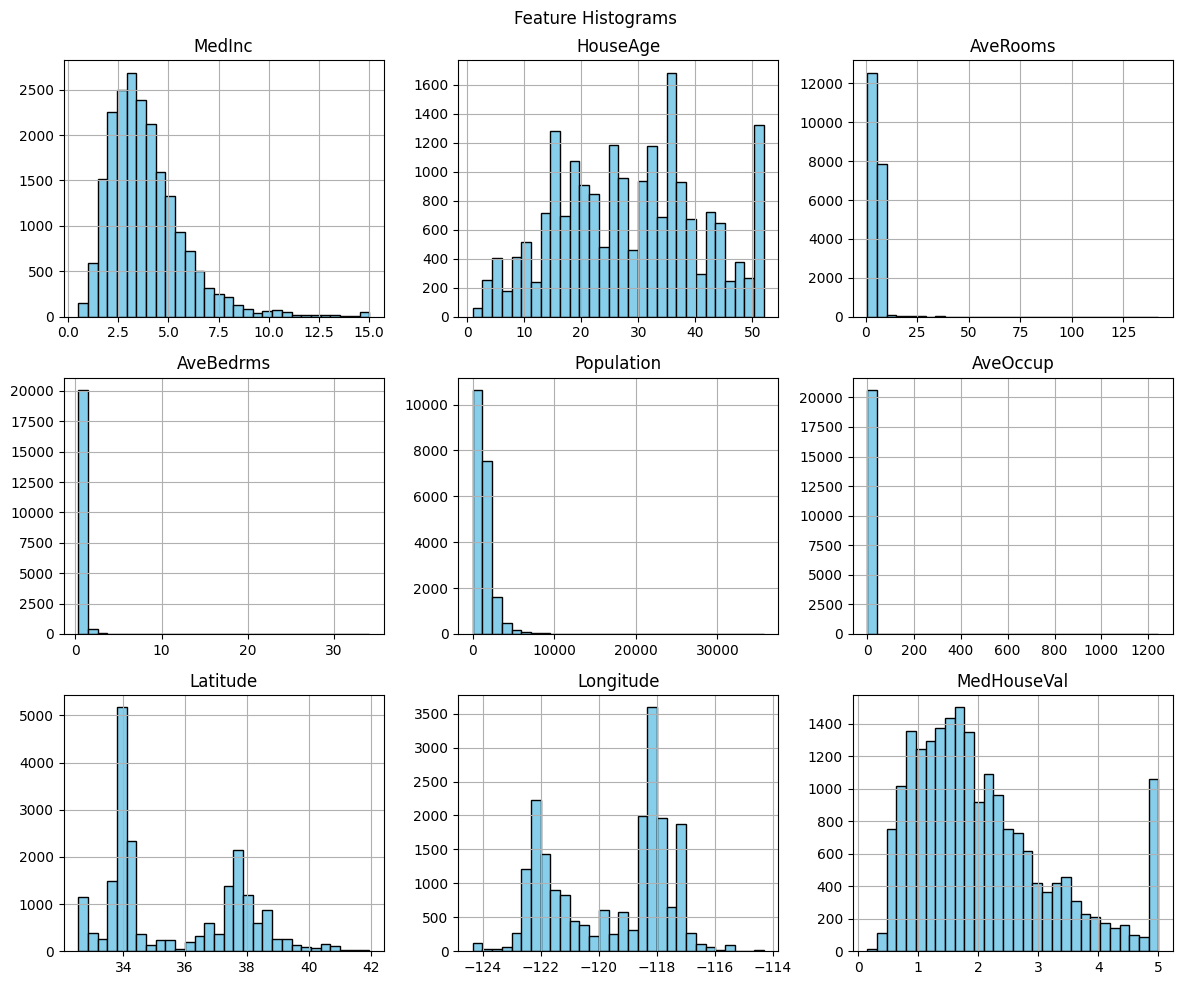

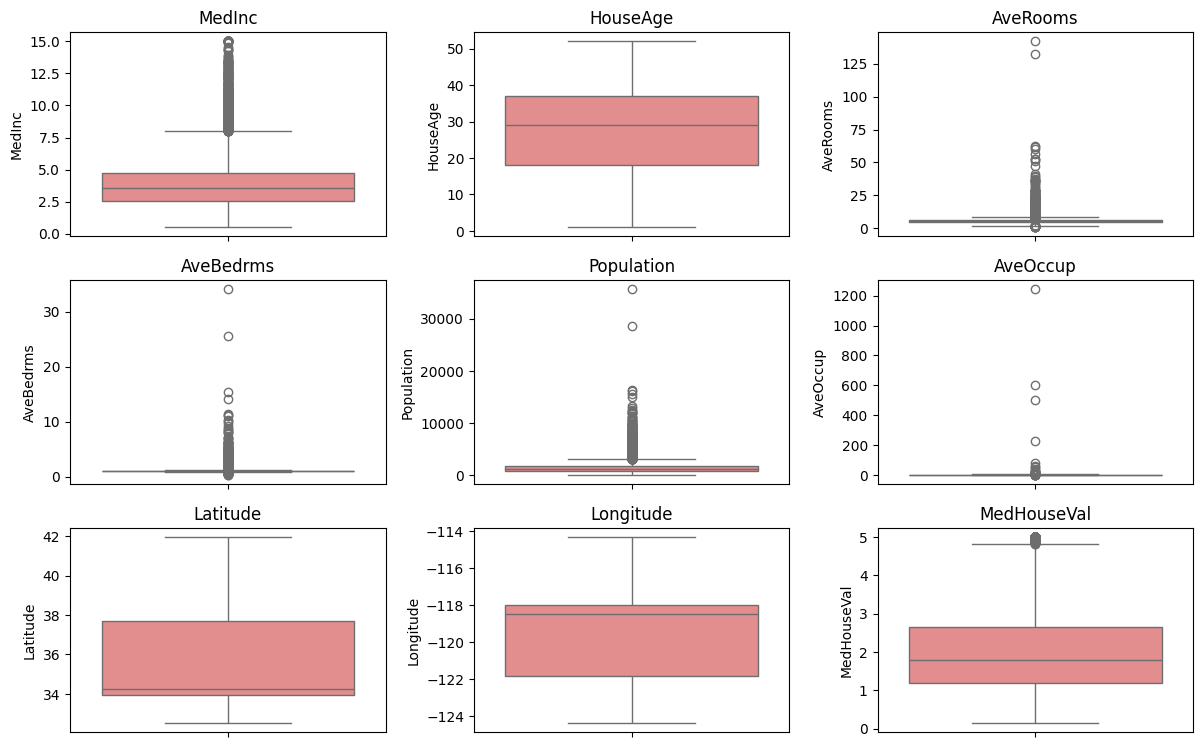


Outliers (IQR):
MedInc: 681 (Bounds: -0.71, 8.01)
HouseAge: 0 (Bounds: -10.50, 65.50)
AveRooms: 511 (Bounds: 2.02, 8.47)
AveBedrms: 1424 (Bounds: 0.87, 1.24)
Population: 1196 (Bounds: -620.00, 3132.00)
AveOccup: 711 (Bounds: 1.15, 4.56)
Latitude: 0 (Bounds: 28.26, 43.38)
Longitude: 0 (Bounds: -127.48, -112.33)
MedHouseVal: 1071 (Bounds: -0.98, 4.82)


In [13]:
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from sklearn.datasets import fetch_california_housing

df = pd.DataFrame(*fetch_california_housing(return_X_y=True), columns=fetch_california_housing().feature_names)
df['MedHouseVal'] = fetch_california_housing().target

df.hist(bins=30, figsize=(12,10), color='skyblue', edgecolor='k')
plt.suptitle('Feature Histograms'), plt.tight_layout(), plt.show()

plt.figure(figsize=(12,10))
for i, c in enumerate(df.columns, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(y=df[c], color='lightcoral')
    plt.title(c)
plt.tight_layout(), plt.show()

print("\nOutliers (IQR):")
for c in df.columns:
    Q1, Q3 = df[c].quantile([0.25, 0.75])
    out = df[(df[c] < Q1 - 1.5*(Q3-Q1)) | (df[c] > Q3 + 1.5*(Q3-Q1))]
    print(f"{c}: {len(out)} (Bounds: {Q1 - 1.5*(Q3-Q1):.2f}, {Q3 + 1.5*(Q3-Q1):.2f})")


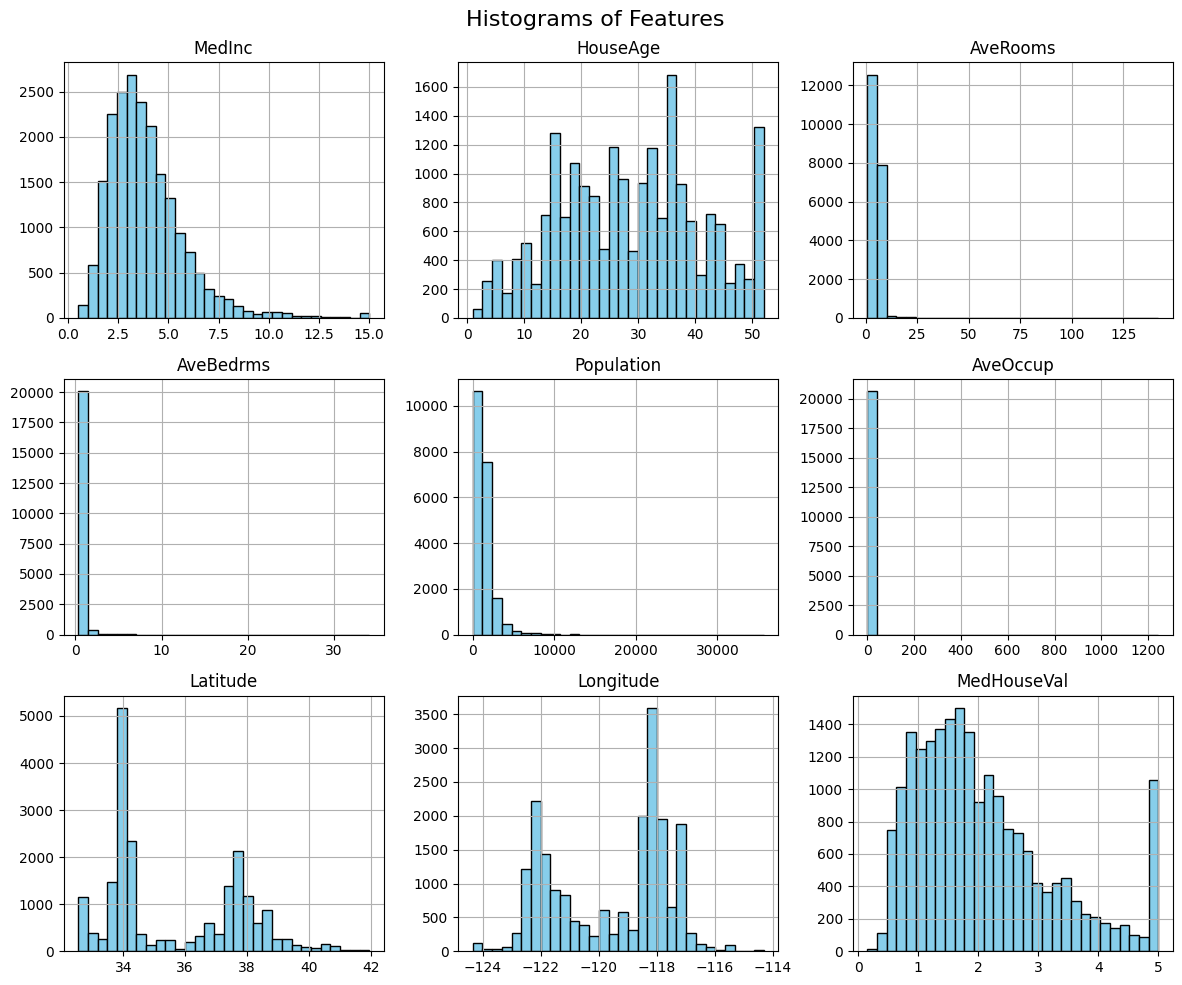

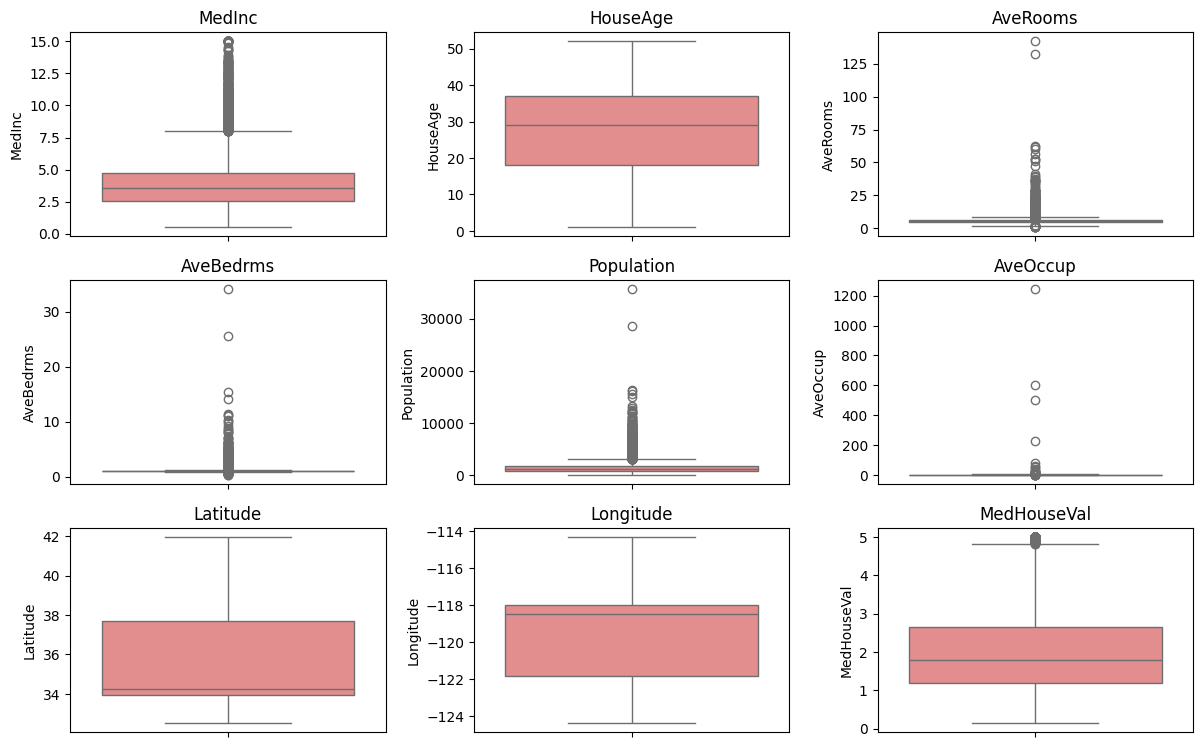


Outlier Detection (IQR Method):
MedInc: 681 outliers (Lower: -0.71, Upper: 8.01)
HouseAge: 0 outliers (Lower: -10.50, Upper: 65.50)
AveRooms: 511 outliers (Lower: 2.02, Upper: 8.47)
AveBedrms: 1424 outliers (Lower: 0.87, Upper: 1.24)
Population: 1196 outliers (Lower: -620.00, Upper: 3132.00)
AveOccup: 711 outliers (Lower: 1.15, Upper: 4.56)
Latitude: 0 outliers (Lower: 28.26, Upper: 43.38)
Longitude: 0 outliers (Lower: -127.48, Upper: -112.33)
MedHouseVal: 1071 outliers (Lower: -0.98, Upper: 4.82)


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['MedHouseVal'] = data.target

df.hist(bins=30, figsize=(12, 10), color='skyblue', edgecolor='black')
plt.suptitle('Histograms of Features', fontsize=16)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 10))
for i, col in enumerate(df.columns, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(y=df[col], color='lightcoral')
    plt.title(col)
plt.tight_layout()
plt.show()

print("\nOutlier Detection (IQR Method):")
for col in df.columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    low, high = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
    outliers = df[(df[col] < low) | (df[col] > high)]
    print(f"{col}: {len(outliers)} outliers (Lower: {low:.2f}, Upper: {high:.2f})")

In [ ]:
EXP 2

               MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
MedInc       1.000000 -0.119034  0.326895  -0.062040    0.004834  0.018766   
HouseAge    -0.119034  1.000000 -0.153277  -0.077747   -0.296244  0.013191   
AveRooms     0.326895 -0.153277  1.000000   0.847621   -0.072213 -0.004852   
AveBedrms   -0.062040 -0.077747  0.847621   1.000000   -0.066197 -0.006181   
Population   0.004834 -0.296244 -0.072213  -0.066197    1.000000  0.069863   
AveOccup     0.018766  0.013191 -0.004852  -0.006181    0.069863  1.000000   
Latitude    -0.079809  0.011173  0.106389   0.069721   -0.108785  0.002366   
Longitude   -0.015176 -0.108197 -0.027540   0.013344    0.099773  0.002476   
MedHouseVal  0.688075  0.105623  0.151948  -0.046701   -0.024650 -0.023737   

             Latitude  Longitude  MedHouseVal  
MedInc      -0.079809  -0.015176     0.688075  
HouseAge     0.011173  -0.108197     0.105623  
AveRooms     0.106389  -0.027540     0.151948  
AveBedrms    0.069721   0.0

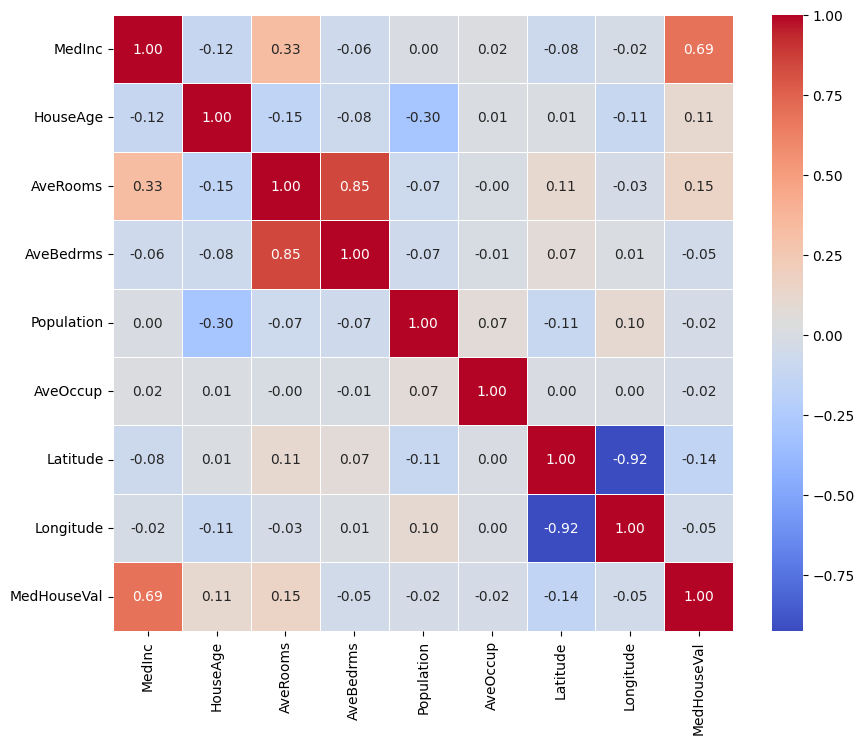

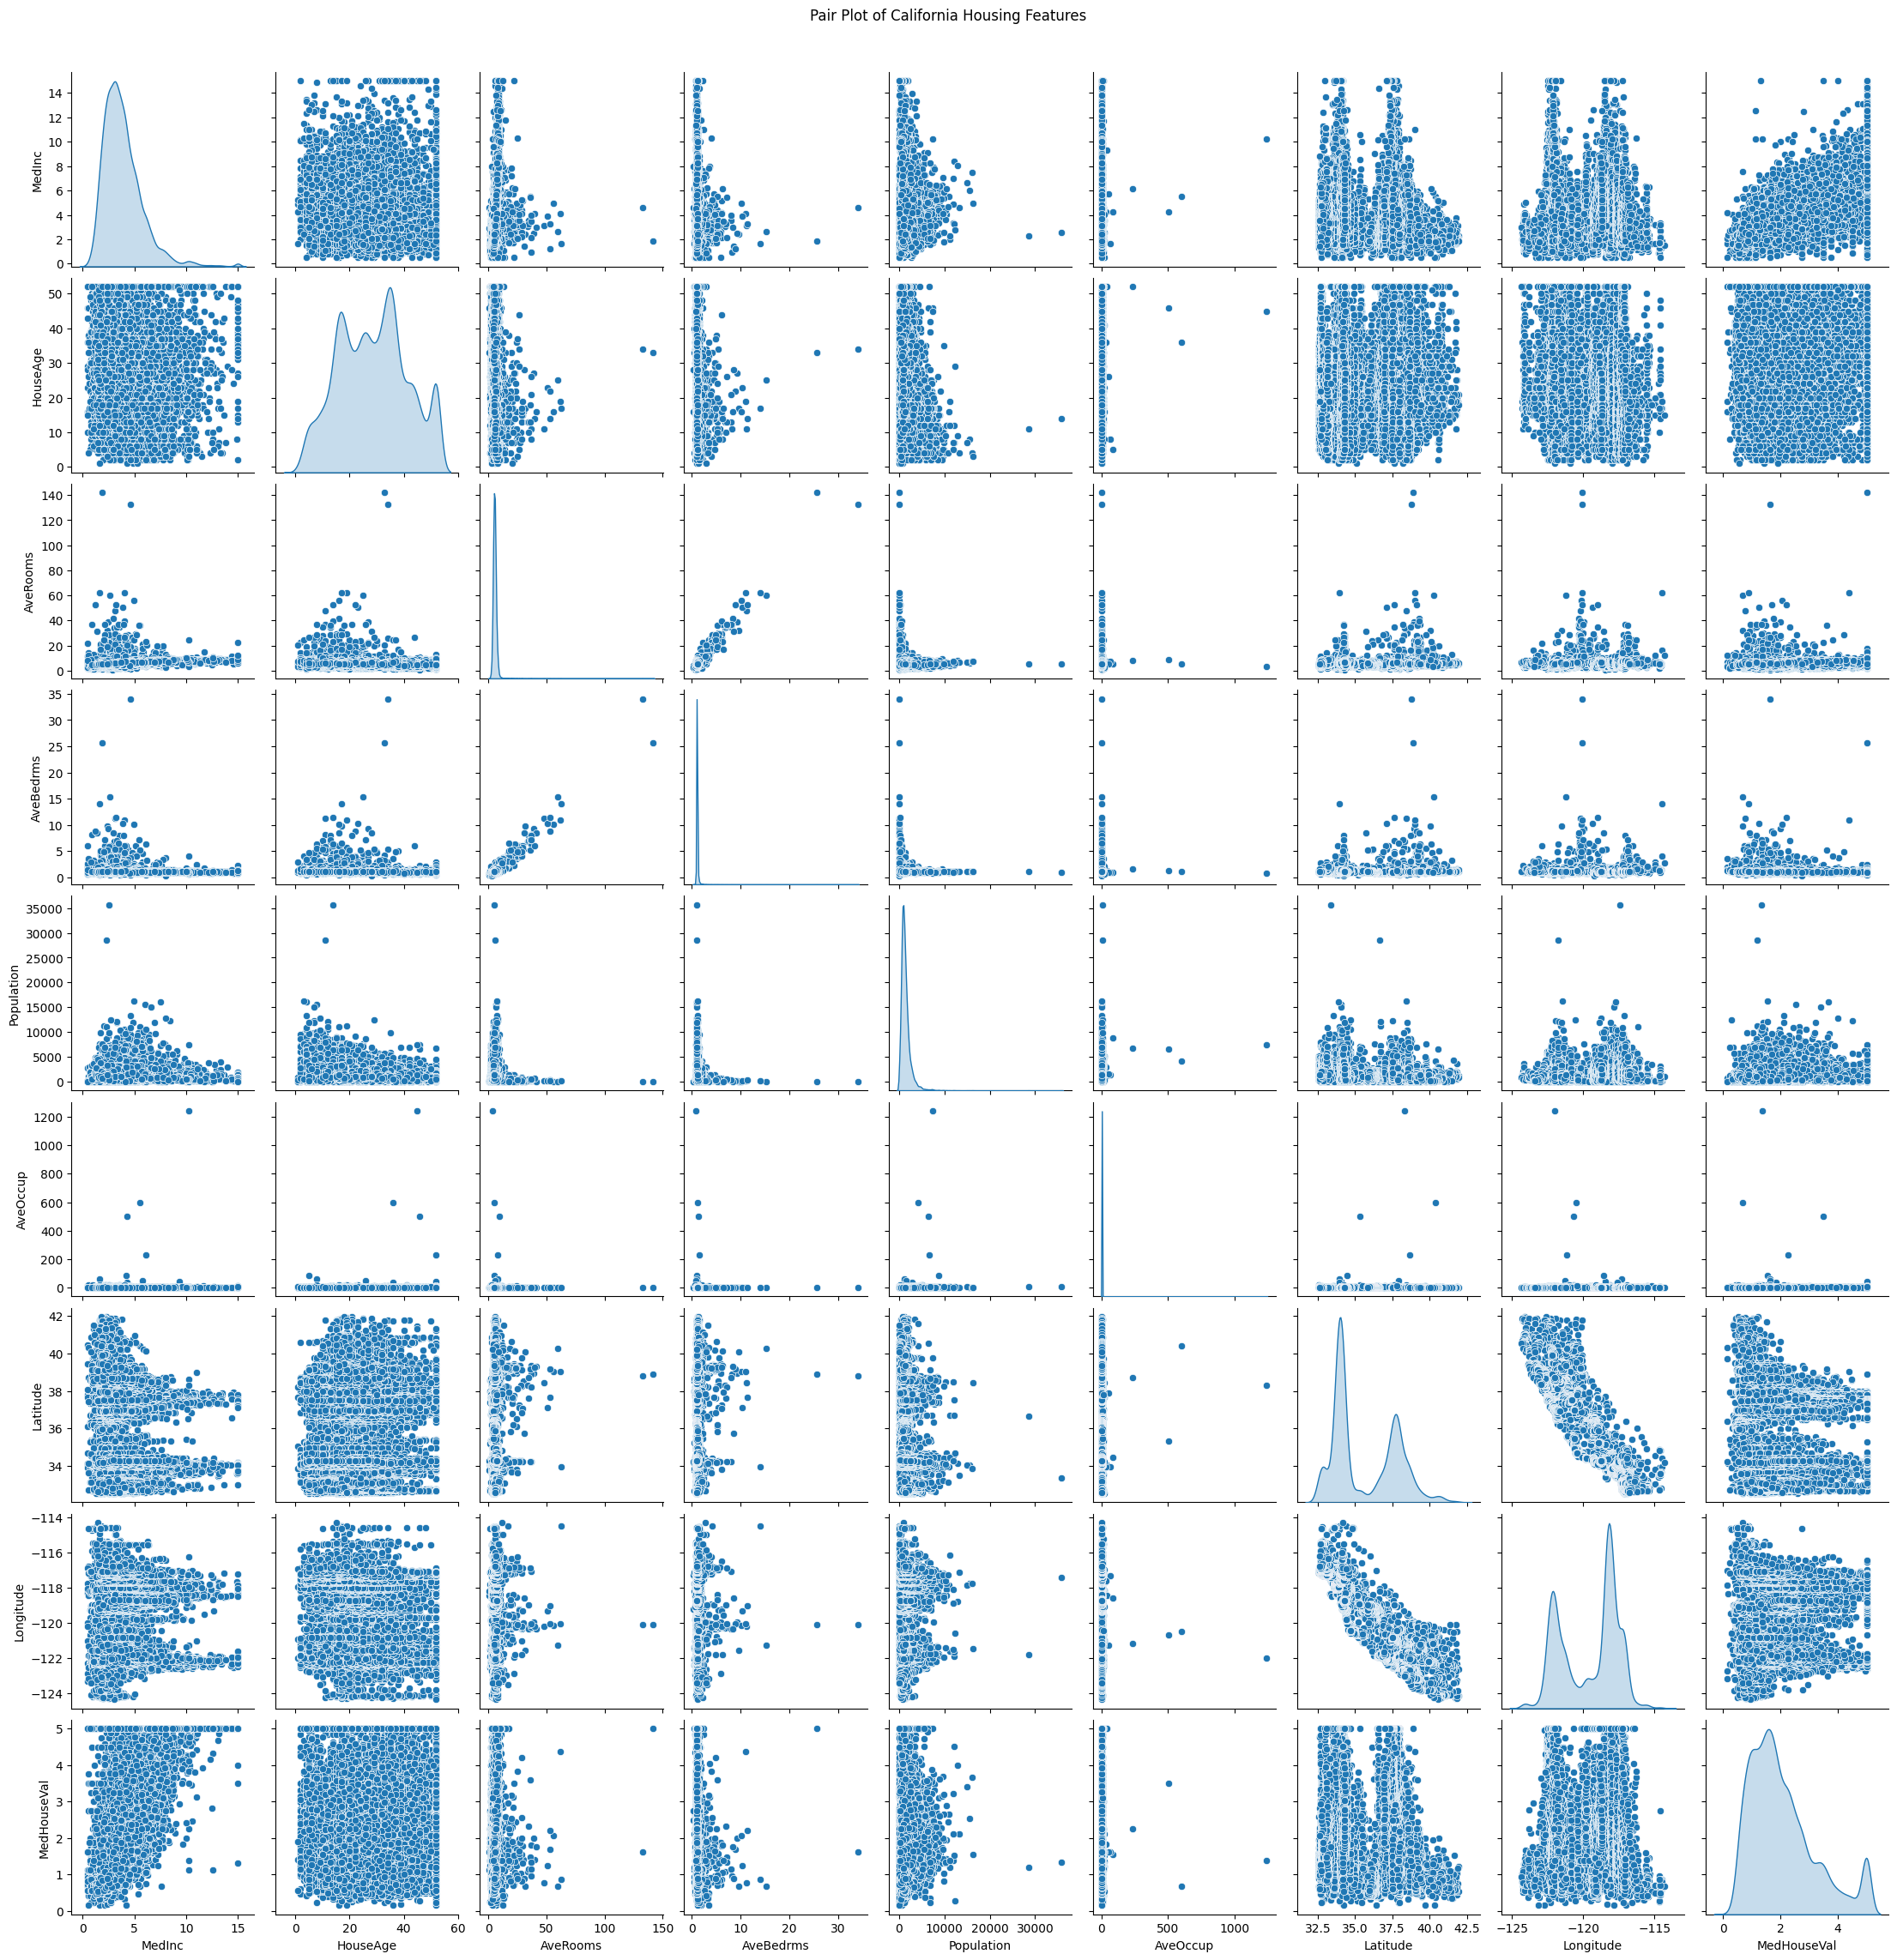

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing(as_frame=True).frame
plt.figure(figsize=(10, 8))
print(data.corr())
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.show()
sns.pairplot(data, diag_kind='kde')
plt.suptitle('Pair Plot of California Housing Features', y=1.02)
plt.show()


In [ ]:
EXP 3

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
        PC1       PC2  species
0 -2.264703  0.480027        0
1 -2.080961 -0.674134        0
2 -2.364229 -0.341908        0
3 -2.299384 -0.597395        0
4 -2.389842  0.646835        0
Explained variance ratio: [0.72962445 0.22850762]


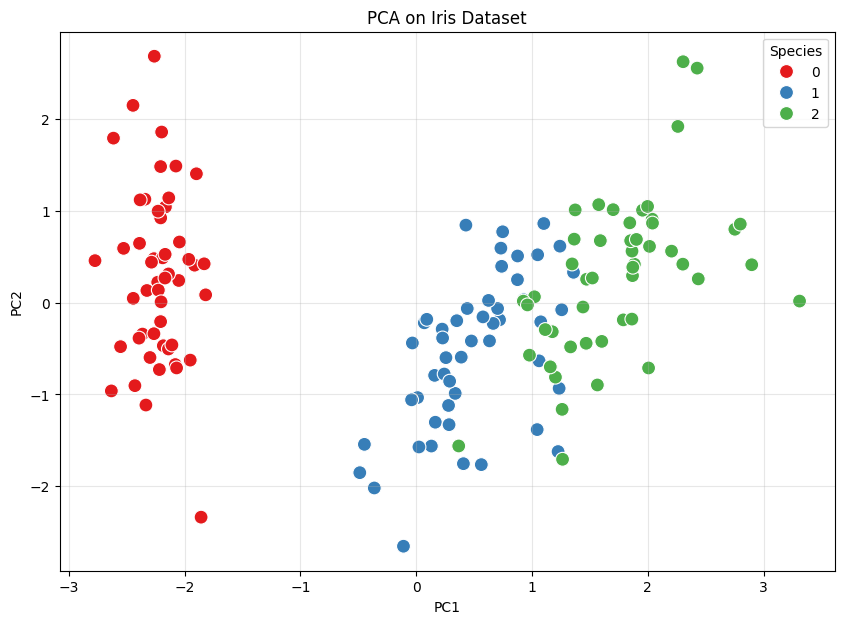

In [83]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
print(data.head())
X = StandardScaler().fit_transform(iris.data)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df['species'] = iris.target
print(df.head())
plt.figure(figsize=(10,7))
print("Explained variance ratio:", pca.explained_variance_ratio_)
sns.scatterplot(data=df, x='PC1', y='PC2', hue='species', palette='Set1', s=100)
plt.title('PCA on Iris Dataset'), plt.grid(alpha=0.3), plt.legend(title='Species')
plt.show()

In [ ]:
Exp 4

In [25]:
import pandas as pd

def find_s(data):
    X, y = data.iloc[:, :-1].values, data.iloc[:, -1].values
    hypo = next((list(row) for row, label in zip(X, y) if label == 'Yes'), None)
    if hypo is None:
        return print("No positive examples found.")
    for row, label in zip(X, y):
        if label == 'Yes':
            hypo = ['?' if h != val else h for h, val in zip(hypo, row)]
    return hypo

data = pd.read_csv('/home/gaurav/aiml/train.csv')
print("Training data:\n", data)
hypo = find_s(data)
if hypo: print("\nFinal hypothesis:", hypo)


Training data:
      sky AirTemperature Humidity   Windy Water Forecast PlayTennis
0  Sunny           Warm   Normal  Strong  Warm     Same        Yes
1  Sunny           Warm     High  Strong  Warm     Same        Yes
2  Rainy           Cold     High  Strong  Warm   Change         No
3  Sunny           Warm     High  Strong  Cool   Change        Yes
4  Rainy           Warm     High    Weak  Warm     Same         No
5  Sunny           Cold   Normal    Weak  Warm     Same        Yes
6  Rainy           Warm   Normal    Weak  Cool   Change         No
7  Sunny           Cold     High    Weak  Cool   Change         No

Final hypothesis: ['Sunny', '?', '?', '?', '?', '?']


In [ ]:
EXP 5


k=1:
x51=0.540, pred=Class2
x52=0.403, pred=Class1
x53=0.253, pred=Class1
x54=0.303, pred=Class1
x55=0.679, pred=Class2
x56=0.922, pred=Class2
x57=0.631, pred=Class2
x58=0.274, pred=Class1
x59=0.124, pred=Class1
x60=0.898, pred=Class2
x61=0.051, pred=Class1
x62=0.351, pred=Class1
x63=0.419, pred=Class1
x64=0.484, pred=Class1
x65=0.166, pred=Class1
x66=0.276, pred=Class1
x67=0.241, pred=Class1
x68=0.156, pred=Class1
x69=0.362, pred=Class1
x70=0.255, pred=Class1
x71=0.859, pred=Class2
x72=0.745, pred=Class2
x73=0.601, pred=Class2
x74=0.673, pred=Class2
x75=0.102, pred=Class1
x76=0.802, pred=Class2
x77=0.487, pred=Class1
x78=0.298, pred=Class1
x79=0.167, pred=Class1
x80=0.840, pred=Class2
x81=0.886, pred=Class2
x82=0.667, pred=Class2
x83=0.621, pred=Class2
x84=0.757, pred=Class2
x85=0.938, pred=Class2
x86=0.271, pred=Class1
x87=0.903, pred=Class2
x88=0.701, pred=Class2
x89=0.395, pred=Class1
x90=0.419, pred=Class1
x91=0.762, pred=Class2
x92=0.481, pred=Class1
x93=0.009, pred=Class1
x94=0

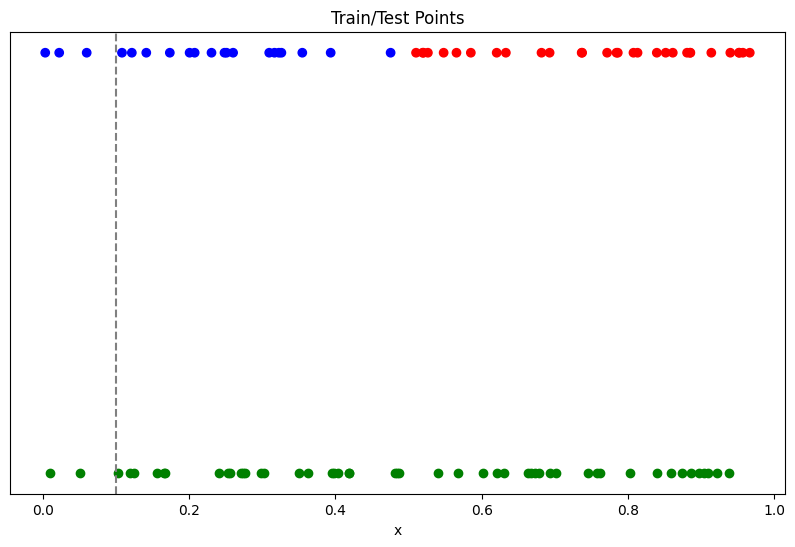

In [12]:
import numpy as np, matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

x = np.random.rand(100)
y = np.array(['Class1' if v <= 0.5 else 'Class2' for v in x[:50]])
Xtr, Xte = x[:50].reshape(-1,1), x[50:].reshape(-1,1)

for k in [1,2,3,4,5,20,30]:
    m = KNeighborsClassifier(k).fit(Xtr, y)
    print(f"\nk={k}:"); [print(f"x{i+51}={v:.3f}, pred={p}") for i,(v,p) in enumerate(zip(x[50:], m.predict(Xte)))]
plt.figure(figsize=(10,6))
plt.scatter(Xtr, [1]*50, c=['b' if l=='Class1' else 'r' for l in y])
plt.scatter(Xte, [0]*50, c='g'); plt.axvline(0.1, c='gray', ls='--')
plt.yticks([]); plt.title("Train/Test Points"); plt.xlabel("x"); plt.show()


In [ ]:
EXP 6

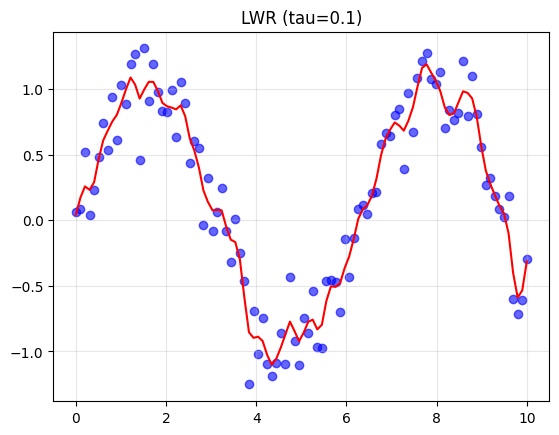

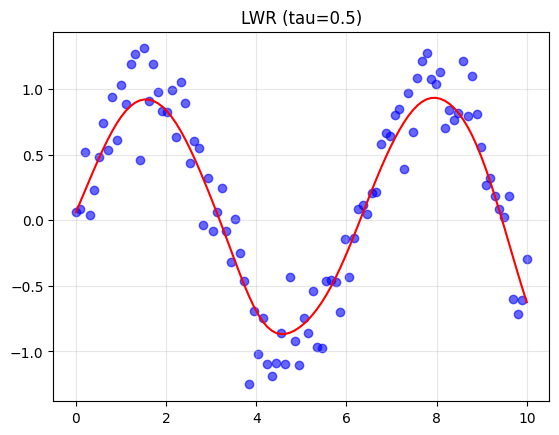

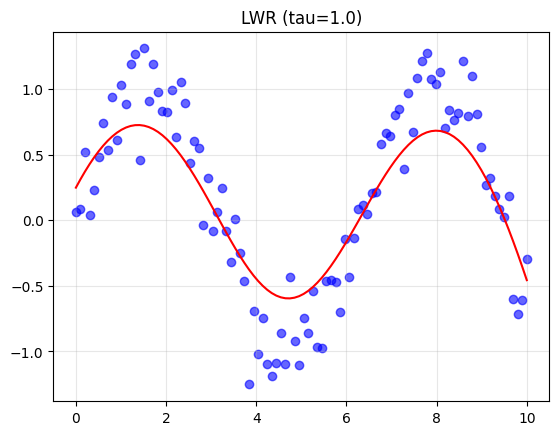

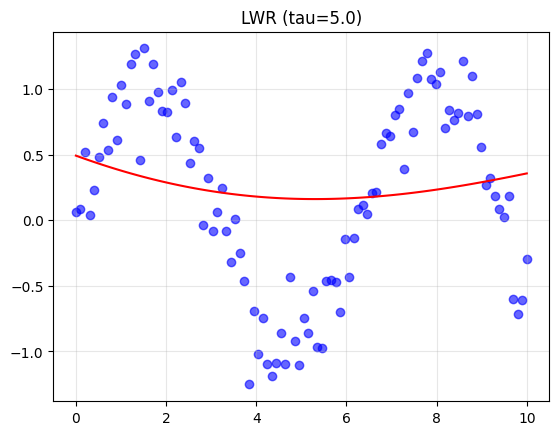

In [7]:
import numpy as np, matplotlib.pyplot as plt

def lwr(xq, X, y, tau):
    Xb, xq = np.c_[np.ones(len(X)), X], np.array([1, xq])
    W = np.diag(np.exp(-np.sum((Xb - xq)**2, 1) / (2 * tau**2)))
    return xq @ np.linalg.pinv(Xb.T @ W @ Xb) @ Xb.T @ W @ y

def plot_lwr(X, y, tau):
    Xq = np.linspace(X.min(), X.max(), 100)
    plt.scatter(X, y, c='b', alpha=0.6), plt.plot(Xq, [lwr(x, X, y, tau) for x in Xq], 'r')
    plt.title(f'LWR (tau={tau})'), plt.grid(alpha=0.3), plt.show()

X = np.linspace(0, 10, 100)
y = np.sin(X) + np.random.normal(0, 0.2, X.shape)
for t in [0.1, 0.5, 1.0, 5.0]: plot_lwr(X, y, t)


In [ ]:
EXP 7

California Housing Linear Regression MSE: 0.5559


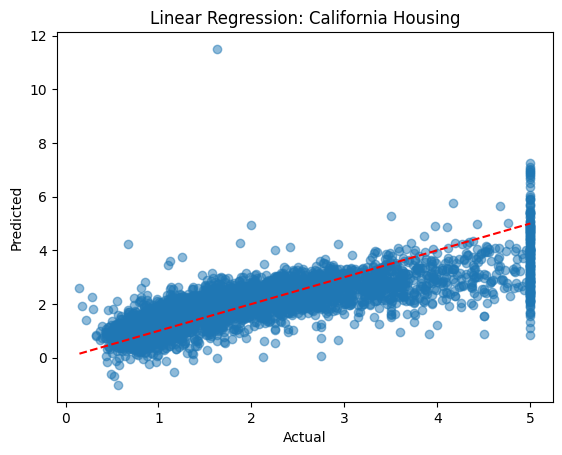

MPG Polynomial Regression (degree 3) MSE: 18.4603


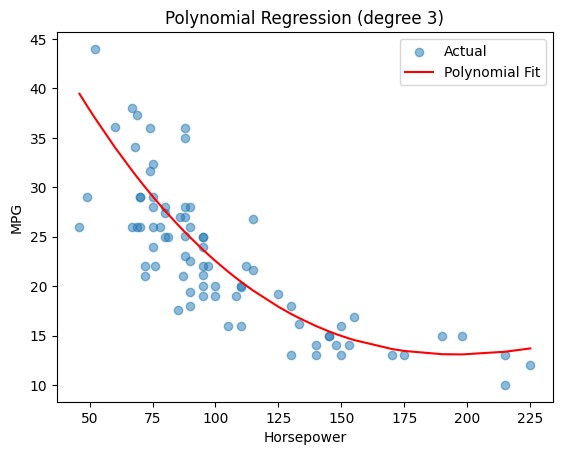

(<matplotlib.legend.Legend at 0x773d8a453620>, None)

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

# --- Linear Regression: California Housing ---
X1, y1 = fetch_california_housing(return_X_y=True)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)
scaler = StandardScaler()
X1_train = scaler.fit_transform(X1_train)
X1_test = scaler.transform(X1_test)

lr_model = LinearRegression().fit(X1_train, y1_train)
y1_pred = lr_model.predict(X1_test)

print(f"California Housing Linear Regression MSE: {mean_squared_error(y1_test, y1_pred):.4f}")
plt.scatter(y1_test, y1_pred, alpha=0.5)
plt.plot([y1_test.min(), y1_test.max()], [y1_test.min(), y1_test.max()], 'r--')
plt.xlabel("Actual"), plt.ylabel("Predicted")
plt.title("Linear Regression: California Housing")
plt.show()

# --- Polynomial Regression: MPG dataset ---
df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/mpg.csv").dropna()
X2, y2 = df[['horsepower']].astype(float), df['mpg']
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)
degree = 3

poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
poly_model.fit(X2_train, y2_train)
y2_pred = poly_model.predict(X2_test)

print(f"MPG Polynomial Regression (degree {degree}) MSE: {mean_squared_error(y2_test, y2_pred):.4f}")
sorted_idx = np.argsort(X2_test.values.flatten())
plt.scatter(X2_test, y2_test, alpha=0.5, label="Actual")
plt.plot(X2_test.values.flatten()[sorted_idx], y2_pred[sorted_idx], 'r', label="Polynomial Fit")
plt.xlabel("Horsepower"), plt.ylabel("MPG")
plt.title(f"Polynomial Regression (degree {degree})")
plt.legend(), plt.show()


In [ ]:
EXP 8

Acc: 0.94
              precision    recall  f1-score   support

           0       0.91      0.93      0.92        43
           1       0.96      0.94      0.95        71

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.93       114
weighted avg       0.94      0.94      0.94       114

CM:
[[40  3]
 [ 4 67]]


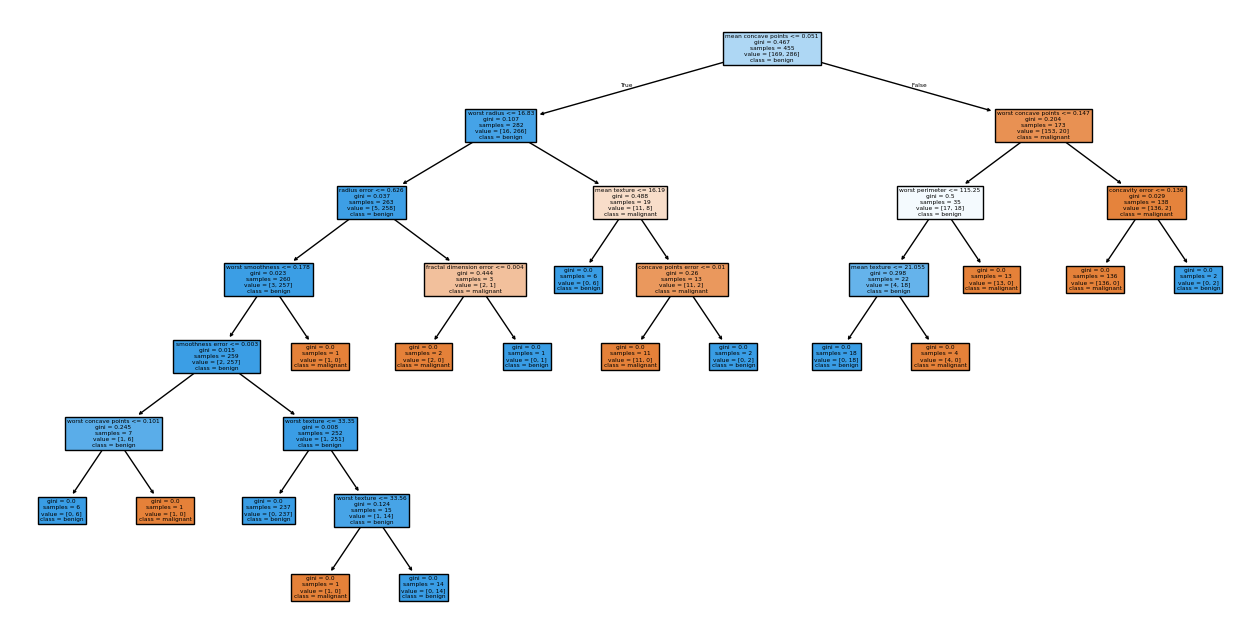

Predicted class: malignant


/home/gaurav/aiml/env/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [9]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X, y = load_breast_cancer(return_X_y=True, as_frame=True)
Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.2, random_state=42)
clf = DecisionTreeClassifier().fit(Xtr, ytr)
yp = clf.predict(Xte)

print(f"Acc: {accuracy_score(yte, yp):.2f}\n{classification_report(yte, yp)}\nCM:\n{confusion_matrix(yte, yp)}")

plt.figure(figsize=(16,8))
plot_tree(clf, feature_names=X.columns, class_names=['malignant','benign'], filled=True)
plt.show()

print("Predicted class:", ['malignant','benign'][clf.predict([X.iloc[0]])[0]])


In [ ]:
EXP 9

Acc: 80.83%

Report:
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      1.00      1.00         2
           2       0.33      0.67      0.44         3
           3       1.00      0.00      0.00         5
           4       1.00      0.50      0.67         4
           5       1.00      1.00      1.00         2
           7       1.00      0.75      0.86         4
           8       1.00      0.67      0.80         3
           9       1.00      0.75      0.86         4
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         1
          12       0.40      1.00      0.57         4
          13       1.00      0.80      0.89         5
          14       1.00      0.40      0.57         5
          15       0.67      1.00      0.80         2
          16       1.00      0.67      0.80         3
          17       1.00      1.00      1.00         3
      

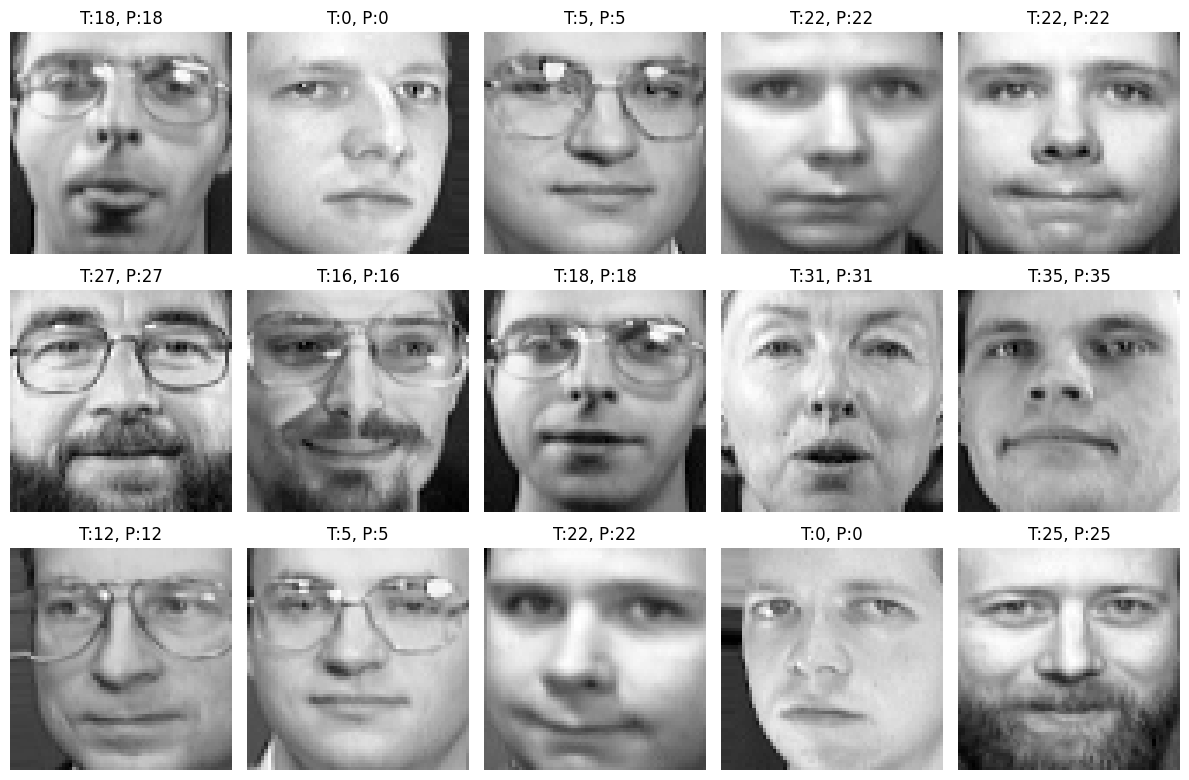

(None, None)

In [10]:
import numpy as np, matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X, y = fetch_olivetti_faces(return_X_y=True, shuffle=True, random_state=42)
Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.3, random_state=42)
model = GaussianNB().fit(Xtr, ytr)
yp = model.predict(Xte)

print(f"Acc: {accuracy_score(yte, yp)*100:.2f}%\n\nReport:\n{classification_report(yte, yp, zero_division=1)}\nCM:\n{confusion_matrix(yte, yp)}")
print(f"CV Acc: {cross_val_score(model, X, y, cv=5).mean()*100:.2f}%")

fig, axs = plt.subplots(3, 5, figsize=(12, 8))
for ax, img, t, p in zip(axs.ravel(), Xte, yte, yp):
    ax.imshow(img.reshape(64, 64), cmap='gray')
    ax.set_title(f"T:{t}, P:{p}"), ax.axis('off')
plt.tight_layout(), plt.show()


In [ ]:
EXP 10

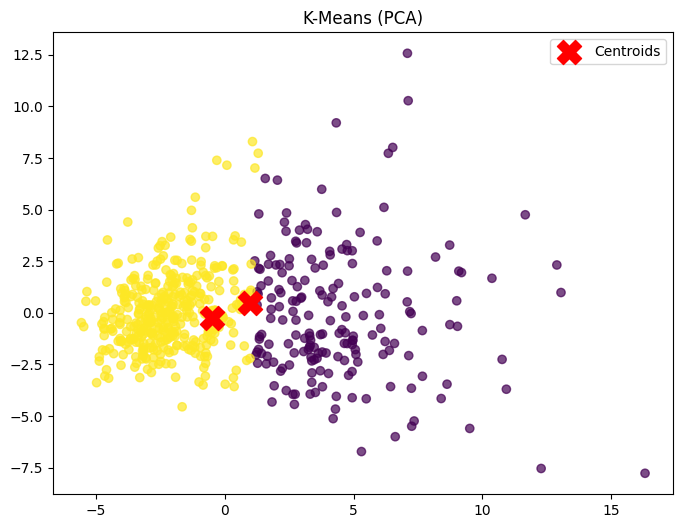

Silhouette: 0.3447


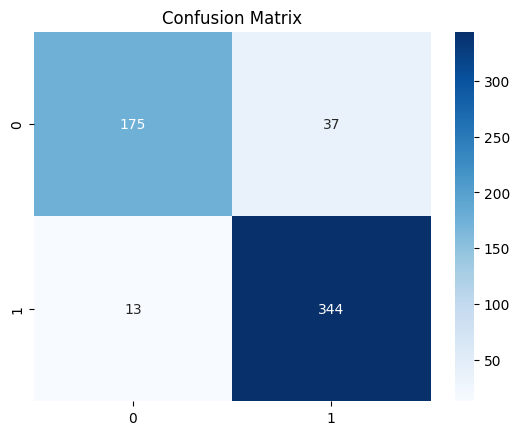

(Text(0.5, 1.0, 'Confusion Matrix'), None)

In [11]:
import numpy as np, matplotlib.pyplot as plt, seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, confusion_matrix

X, y = StandardScaler().fit_transform(load_breast_cancer().data), load_breast_cancer().target
kmeans = KMeans(n_clusters=2, random_state=42).fit(X)
y_kmeans, pca = kmeans.labels_, PCA(n_components=2).fit_transform(X)
plt.figure(figsize=(8,6))
plt.scatter(*pca.T, c=y_kmeans, cmap='viridis', alpha=0.7)
plt.scatter(*kmeans.cluster_centers_[:, :2].T, c='red', s=300, marker='X', label='Centroids')
plt.title('K-Means (PCA)'), plt.legend(), plt.show()

print(f"Silhouette: {silhouette_score(X, y_kmeans):.4f}")
sns.heatmap(confusion_matrix(y, y_kmeans), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix'), plt.show()


CA Housing LR MSE: 0.5559


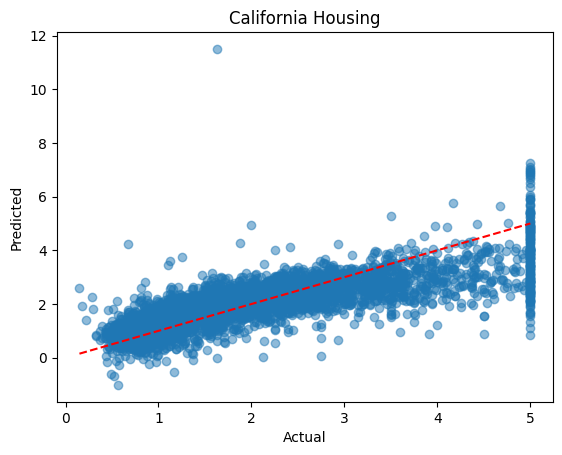

MPG PolyReg MSE: 18.4603


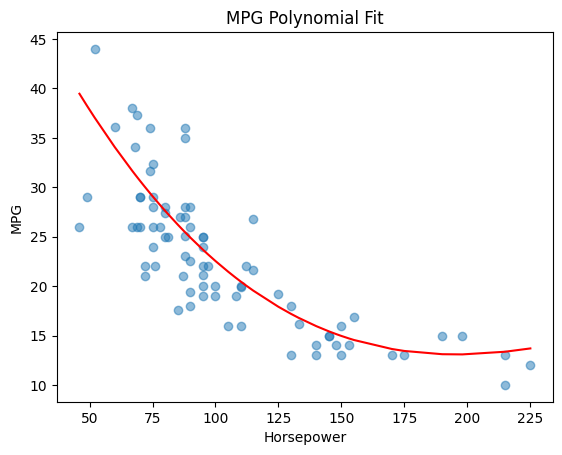

(Text(0.5, 1.0, 'MPG Polynomial Fit'),
 Text(0.5, 24.0, 'Horsepower'),
 Text(24.000000000000007, 0.5, 'MPG'),
 None)

In [6]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

# California Housing Linear Regression
X, y = fetch_california_housing(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(StandardScaler().fit_transform(X), y, test_size=0.2, random_state=42)
pred = LinearRegression().fit(X_train, y_train).predict(X_test)
print(f"CA Housing LR MSE: {mean_squared_error(y_test, pred):.4f}")
plt.scatter(y_test, pred, alpha=0.5), plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title("California Housing"), plt.xlabel("Actual"), plt.ylabel("Predicted"), plt.show()

# MPG Polynomial Regression
df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/mpg.csv").dropna()
X2, y2 = df[['horsepower']], df['mpg']
X2_tr, X2_te, y2_tr, y2_te = train_test_split(X2, y2, test_size=0.2, random_state=42)
model = make_pipeline(PolynomialFeatures(3), LinearRegression()).fit(X2_tr, y2_tr)
pred2 = model.predict(X2_te)
print(f"MPG PolyReg MSE: {mean_squared_error(y2_te, pred2):.4f}")
idx = np.argsort(X2_te.values.flatten())
plt.scatter(X2_te, y2_te, alpha=0.5), plt.plot(X2_te.values.flatten()[idx], pred2[idx], 'r')
plt.title("MPG Polynomial Fit"), plt.xlabel("Horsepower"), plt.ylabel("MPG"), plt.show()
